<a href="https://colab.research.google.com/github/mariacarolinaboabaid/MP5/blob/main/MP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TÍTULO DA PRÁTICA: COLOCANDO TUDO EM ORDEM E GUARDANDO

# Nome do Aluno: Maria Carolina Knudsen Boabaid
# Nome do Campus: Estácio Polo Ingleses
# Nome da Disciplina: Colocando tudo em ordem e guardando
# Turma do Semestre 22.3
#

# Objetivo da prática: 
# A) O primeiro objetivo da prática é aprender a gerar dados aleatórios (nome e pontuação) por meio da biblioteca Faker. 
# B) O segundo e terceiro objetivo são respectivamente, guardar estes dados em um arquivo de texto e recuperá-los do arquivo de texto, no presente trabalho, esta tarefa foi realizada através da biblioteca Pandas.
# C) O quarto objetivo é gerar, com os dados de pontuação recuperados do arquivo de texto, um histograma que demonstre a probabilidade de chance de cada pontuação.
# D) O quinto e último objetivo é gerar uma nuvem de palavras com as pontuações recuperadas na forma escrita.

# Questionamentos:
# 1) Qual a importância de trabalhar com arquivos de texto? 
# A importância é saber trabalhar com dados que não estão declarados em nosso código, de forma que aprendemos a trabalhar com banco de dados e arquivos externos.
# 2) Qual a importância de visualizar os dados em um histograma?
# O histograma auxilia na visualização dos dados, trazendo ao usuário informações visuais dos dados, facilitando a sua análise e percepção.
# 3) O que significa a visualização por nuvem de palavras?
# É outro método de visualização de dados, que apresenta a frequeência que determinadas palavras aparecem em uma amostra de dados.


In [ ]:
# INSTALAÇÃO
!pip install faker
!pip install wordcloud
!pip install num2words

In [ ]:
# IMPORTES
from pandas import *
from faker import Faker
import matplotlib.pyplot as plt
from num2words import num2words
from wordcloud import WordCloud

In [ ]:
# GERAÇÃO DE DADOS
fake = Faker("pt_BR")
dados = {}
nomes = []
pontuacao = []

for i in range(1, 11):
    nomes.append(fake.name())
    pontuacao.append(fake.random_int(0,10))

dados["Nome"] = nomes
dados["Pontuacao"] = pontuacao
print(dados)

{'Nome': ['Alícia Freitas', 'Eduarda da Paz', 'Maria Luiza Cavalcanti', 'Noah Ramos', 'Dr. Vicente Santos', 'Melissa Nunes', 'Valentina Martins', 'Ana Vitória Aragão', 'Luiza Teixeira', 'João Miguel Azevedo'], 'Pontuacao': [0, 3, 3, 3, 6, 3, 3, 7, 0, 10]}


In [ ]:
# GRAVANDO DADOS EM UM ARQUIVO DE TEXTO
dadosFrame = pandas.DataFrame(data=dados)
dadosFrame.to_csv("dadosMP5.csv", index=False)

In [ ]:
# RECUPERANDO OS DADOS DE UM ARQUIVO DE TEXTO
lendoArquivo = pandas.read_csv("dadosMP5.csv")

# EXTRAINDO OS DADOS DO ARQUIVO PARA O HISTOGRAMA
pontuacaoColuna = lendoArquivo['Pontuacao']
pontuacaoArquivo = []

for item in pontuacaoColuna:
  pontuacaoArquivo.append(item)
print(pontuacaoArquivo)

[0, 3, 3, 3, 6, 3, 3, 7, 0, 10]


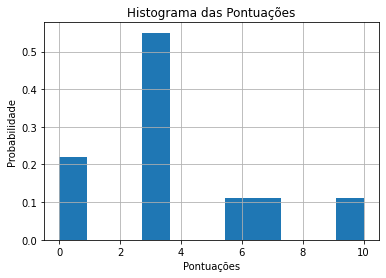

In [ ]:
# HISTOROGRAMA DAS PONTUAÇÕES
plt.hist(pontuacaoArquivo, bins=11, density=True)
plt.xlabel("Pontuações")
plt.ylabel("Probabilidade")
plt.title("Histograma das Pontuações")
plt.grid(True)
plt.show()

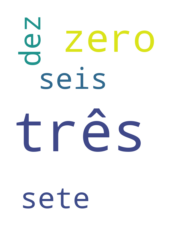

In [ ]:
# VISUALIZAÇÃO EM NUVEM DAS PONTUAÇÕES
pontuacaoEscrita = " "

for item in pontuacaoArquivo:
  itemStr = str(item)
  numEscrito = num2words(itemStr, lang="pt-br")
  numEscritoVirgula = numEscrito + ", "
  pontuacaoEscrita = pontuacaoEscrita + numEscritoVirgula


nuvem = WordCloud(background_color="white", height=800, width=600)
nuvem.generate(pontuacaoEscrita)

plt.imshow(nuvem, interpolation='bilinear')
plt.axis("off")

nuvem.to_file("nuvem_pontuacao.png")

